In [7]:
##Autoencoders
from keras.layers import Input, Dense
from keras.models import Model

#reduced or encoded size
encoding_dim = 32 

input_img = Input(shape=(784, ))
#encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
#lossy reconstruction
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [8]:
encoder = Model(input_img, encoded) #input to encoding

In [9]:
#decoder
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1] #last layer
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
#per pixel binary cross entropy loss ?
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [1]:
from keras.datasets import mnist
import numpy as np
(x_train,_), (x_test, _) = mnist.load_data('../../exmoh/data/mnist/mnist')

Using Theano backend.


In [2]:
#normalize values between 0 and 1
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
#vectorize images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=0)

In [11]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

ERROR: Line magic function `%plt.show` not found.


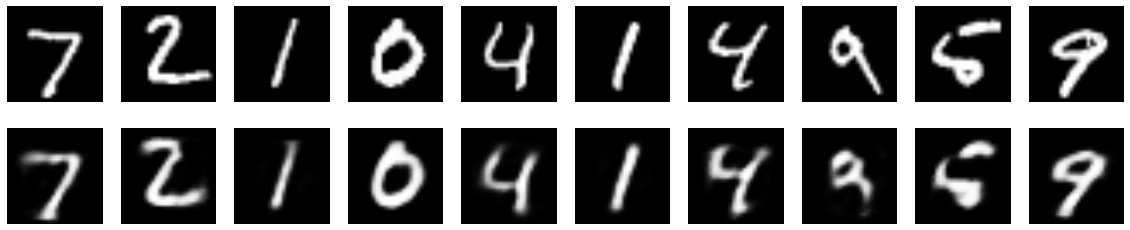

In [12]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [11]:
autoencoder.save('autoenc.keras')

In [10]:
autoencoder.load_weights('autoenc.keras')

In [4]:
help(autoencoder.load_weights)

Help on method load_weights in module keras.engine.topology:

load_weights(self, filepath, by_name=False) method of keras.engine.training.Model instance
    Loads all layer weights from a HDF5 save file.
    
    If `by_name` is False (default) weights are loaded
    based on the network's topology, meaning the architecture
    should be the same as when the weights were saved.
    Note that layers that don't have weights are not taken
    into account in the topological ordering, so adding or
    removing layers is fine as long as they don't have weights.
    
    If `by_name` is True, weights are loaded into layers
    only if they share the same name. This is useful
    for fine-tuning or transfer-learning models where
    some of the layers have changed.
    
    # Arguments
        filepath: String, path to the weights file to load.
        by_name: Boolean, whether to load weights by name
            or by topological order.
    
    # Raises
        ImportError: If h5py is not a

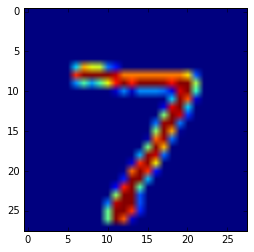

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_test[0].reshape(28, 28))

In [14]:
from keras.datasets import cifar10
from scipy.misc import toimage

Untaring file...


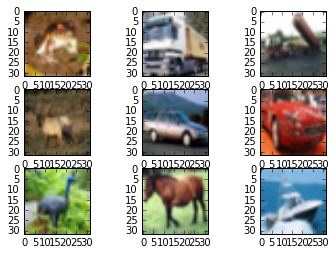

In [21]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(toimage(x_train[i]))

In [18]:
help(cifar10.load_data)

Help on function load_data in module keras.datasets.cifar10:

load_data()
    Loads CIFAR10 dataset.
    
    # Returns
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.



In [20]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [22]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
#one hot encoding for the class labels
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [26]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(3, 32, 32), padding = 'same', activation='relu',
                kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
epochs=25
lrate = 0.01
decay=lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

In [27]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
15904/50000 [========>.....................] - ETA: 185s - loss: 2.0804 - acc: 0.2407

KeyboardInterrupt: 

In [32]:
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
 
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data('../../exmoh/data/mnist/mnist')
 
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
 
# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1,28,28)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, epochs=1, verbose=1)
 
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

Epoch 1/1
60000/60000 [==============================] - 123s - loss: 0.2037 - acc: 0.9380   


In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 24, 24)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [33]:
score

[0.049994818307692188, 0.98399999999999999]

In [34]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [36]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data('../../exmoh/data/imdb',
                                                      num_words=top_words)

In [46]:
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [47]:
X_train.shape

(25000, 500)

In [48]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 213,301.0
Trainable params: 213,301
Non-trainable params: 0.0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 662s - loss: 0.4957 - acc: 0.7480 - val_loss: 0.3882 - val_acc: 0.8354
Epoch 2/3
25000/25000 [==============================] - 597s - loss: 0.3153 - acc: 0.8731 - val_loss: 0.3296 - val_acc: 0.8652
Epoch 3/3
25000/25000 [==============================] - 576s - loss: 0.2574 - acc: 0